# Curve fitting

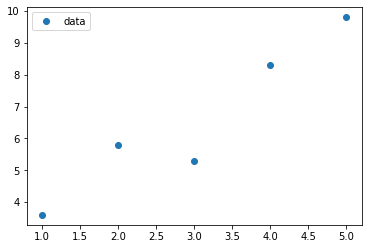

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])
plt.plot(data[0],data[1],'o',label='data');
plt.legend();

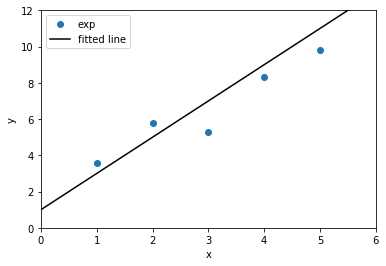

In [5]:
plt.plot(data[0],data[1],'o',label='exp');
plt.xlim(0,6);plt.ylim(0,12);plt.xlabel('x');plt.ylabel('y')

x=np.arange(0,10,0.1)
a=2;b=1
y=a*x+b
plt.plot(x,y,'k-',label='fitted line');
plt.legend();

## Least squares method

최소제곱법(least squares method)은 실험이나 관측을 통해 주어진 데이터로부터 패턴을 예측하는 간단하며 효과적인 방법입니다. 위의 예시처럼 데이터가 주어져 있고 이를 통해 x와 y 사이에 선형 관계를 추측하는 과정을 살펴봅시다. x와 y가 선형 관계를 가지고 있다고 가정하면  
\begin{equation}
y=ax + b
\end{equation}

우리가 해야하는 일은 데이터로부터 $a,b$ 값을 얻는 것입니다. 방정식과 데이터 사이에 오차가 가장 작게 만드는 $a,b$가 최적의 값이라고 하면 결국 이 문제는 다음의 값을 최소화하는 문제가 됩니다.  
\begin{equation}
\chi = \sum_i (y_i - a x_i +b)^2 
\end{equation}
$\chi$가 최소값이 되려면 극값이어야 하므로 다음의 조건을 만족해야 합니다.
\begin{equation}
\frac{\partial \chi}{\partial a} =\frac{\partial \chi}{\partial b}=0. 
\end{equation}
따라서 아래의 두 식을 얻을 수 있습니다.
\begin{equation}
\sum_i (2a x_i^2 -2 x_i y_i + 2 b x_i) =0, \\  
\sum_i (2b - 2 y_i + 2a x_i)=0.  
\end{equation}
식을 간단히 하게 위해 양변을 $N$으로 나누고 평균값들을 다음처럼 정의합니다.
\begin{equation}
\frac{1}{N}\sum_i x_i = \langle X \rangle, \quad
\frac{1}{N}\sum_i x_i^2 = \langle X^2 \rangle, \quad
\frac{1}{N}\sum_i y_i = \langle Y \rangle, \quad
\frac{1}{N}\sum_i x_i y_i = \langle XY \rangle. 
\end{equation}
따라서 우리가 풀어야 하는 연립방정식은
\begin{equation}
a \langle X \rangle + b = \langle Y \rangle, \\
a \langle X^2 \rangle + b \langle X \rangle = \langle XY \rangle,
\end{equation}
이 된다.
최종적으로 최소제곱법으로 구한 기울기와 y절편은 다음과 같다.
\begin{equation}
a=\frac{\langle XY \rangle - \langle X \rangle \langle Y \rangle}{\langle X^2 \rangle - \langle X\rangle^2}, \quad
b=\frac{\langle X^2 \rangle \langle Y\rangle - \langle X \rangle \langle X Y \rangle}{\langle X^2 \rangle - \langle X\rangle^2}
\end{equation}


In [6]:
# 위에서 주어진 데이터에 대해서 a, b를 구해보자.
data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])
xdata = data[0]
ydata = data[1]

N=len(xdata)
X=sum(xdata)/N
Y=sum(ydata)/N
X2=sum([i**2 for i in xdata])/N
XY=sum(xdata*ydata)/N

a2,b2=(XY-X*Y)/(X2-X*X),(X2*Y-X*XY)/(X2-X*X)
a2,b2

(1.4900000000000002, 2.0899999999999963)

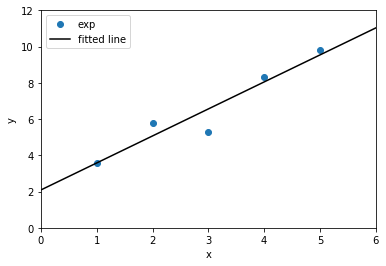

In [7]:
plt.plot(data[0],data[1],'o',label='exp');
plt.xlim(0,6);plt.ylim(0,12);plt.xlabel('x');plt.ylabel('y')

x=np.arange(0,10,0.1)
y=a2*x+b2
plt.plot(x,y,'k-',label='fitted line');
plt.legend();

## Optimize.curve_fit

* 'curve_fit'  
curve_fit(model function, xdata, ydata)  
returns: optimal values for the parameters, covariance (standard deviation)

* https://en.wikipedia.org/wiki/Non-linear_least_squares

In [9]:
import scipy.optimize

# again let us test the 'data'
data = np.array([[1.,2.,3.,4.,5.],[3.6,5.8,5.3,8.3,9.8]])
xdata = data[0]
ydata = data[1]

def func(x,a,b):
    return a*x+b
popt, pcov = scipy.optimize.curve_fit(func,xdata,ydata)

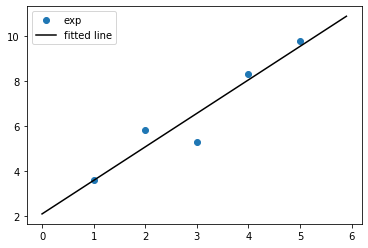

In [10]:
plt.plot(data[0],data[1],'o',label='exp');

x=np.arange(0,6,0.1)
plt.plot(x,func(x, popt[0], popt[1]), 'k-',label='fitted line');
plt.legend();

### 예제 : 코로나 확진자 수의 함수

In [11]:
# 이전처럼 데이터를 불러옵니다.
# 다음의 코드를 이용하세요.
import csv

f=open('../as/data/countries.csv', newline='')
reader = csv.reader(f)
countries = list(reader)

name=[str(x[1]) for x in countries[1:]]
nc=[]
ind=0
for i in name:
    temp=[[i,float(x[2]),float(x[3]),float(x[4])] for x in countries[1:] if x[1]==i]
    nc.append(temp)
    ind += 1
# nc[90]: Korea

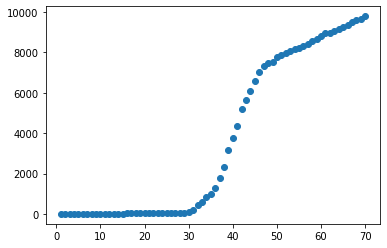

In [12]:
nkorea=np.array([i[1] for i in nc[90]]) # 한국 확진자 수의 리스트
days=np.arange(1,len(nkorea)+1,1) # 날짜 리스트
plt.plot(days,nkorea,'o');

In [313]:
# 위의 그래프는 명백히 선형이 아니며, 함수의 형태를 쉽게 추측하기 힘들다. 로지스틱 함수를 시도해보자.

In [13]:
xdata = days
ydata = nkorea

def func1(x,a,b,c,d):
    return c/(1+np.exp(d-a*(x-b)))

popt1, pcov1 = scipy.optimize.curve_fit(func1,xdata,ydata)

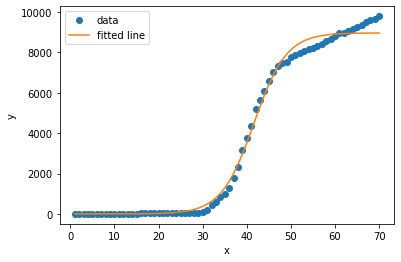

In [14]:
plt.xlabel('x');plt.ylabel('y')

plt.plot(days,nkorea,'o',label='data')
plt.plot(xdata,func1(xdata,*popt1),label='fitted line')
plt.legend();